In [1]:
import srkdata
import csv
import srktext
%matplotlib inline
import srkdata
import srkmisc
import matplotlib.pyplot as plt
import numpy as np
import math
import srkgraphics
import srkanalysis
from scipy.optimize import curve_fit
from matplotlib.legend_handler import HandlerLine2D
from pylab import rcParams
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
rcParams.update(params)
graphs_dir='/home/mjbales/work/nedm/graphs/'

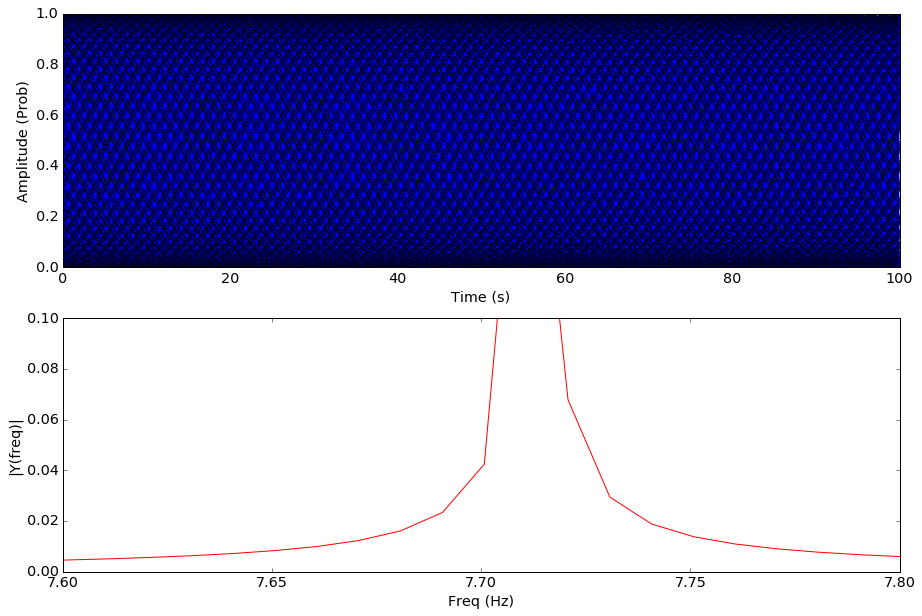

In [4]:
txt_file_path=srkdata.SRKSystems.hists_dir+"data_steps_RID7537_P.txt"
data=srktext.read_delimited_txt(txt_file_path)
t,prob=zip(*data)
t=map(float,t)
prob=map(float,prob)

fig, ax = plt.subplots(2, 1)
ax[0].plot(t,prob,marker="*")
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude (Prob)')

Fs = 1.0/(t[1]-t[0])  # sampling rate
Ts = 1.0/Fs # sampling interval

n = len(prob) # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
frq = frq[range(n/2)] # one side frequency range

fft_prob=np.fft.fft(prob)/n
fft_prob = fft_prob[range(n/2)]

ax[1].plot(frq,abs(fft_prob),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
ax[0].axis([ 0, 100,0, 1])
ax[1].axis([ 7.6, 7.8,0, 0.1])
plt.savefig(graphs_dir+"test.png", bbox_inches='tight')
plt.show()

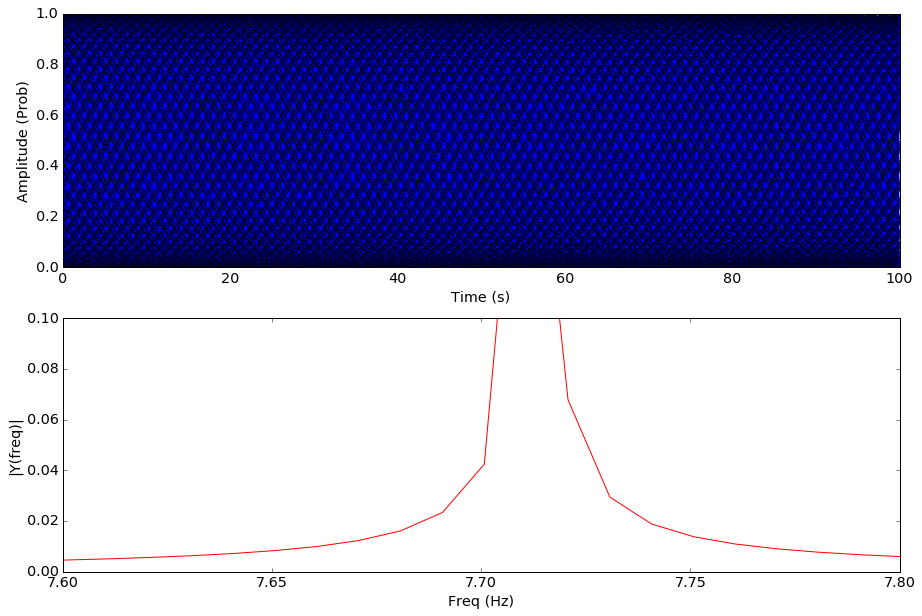

In [5]:
txt_file_path=srkdata.SRKSystems.hists_dir+"data_steps_RID7541_P.txt"
data=srktext.read_delimited_txt(txt_file_path)
t2,prob2=zip(*data)
t2=map(float,t2)
prob2=map(float,prob2)

fig, ax = plt.subplots(2, 1)
ax[0].plot(t,prob,marker="*")
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude (Prob)')

Fs = 1.0/(t2[1]-t2[0])  # sampling rate
Ts = 1.0/Fs # sampling interval

n = len(prob2) # length of the signal
k = np.arange(n)
T = n/Fs
frq2 = k/T # two sides frequency range
frq2 = frq[range(n/2)] # one side frequency range

fft_prob2 =np.fft.fft(prob2)/n
fft_prob2 = fft_prob[range(n/2)]

ax[1].plot(frq2,abs(fft_prob2),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
ax[0].axis([ 0, 100,0, 1])
ax[1].axis([ 7.6, 7.8,0, 0.1])
plt.savefig(graphs_dir+"test2.png", bbox_inches='tight')
plt.show()

NameError: name 'frq2' is not defined

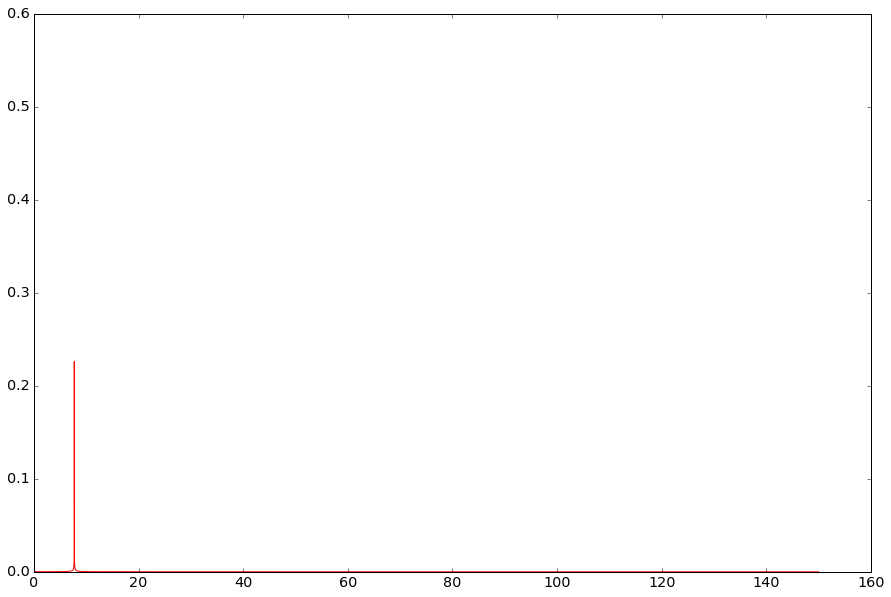

In [4]:
plt.plot(frq,abs(fft_prob),'r') # plotting the spectrum
plt.plot(frq2,abs(fft_prob2),'b') # plotting the spectrum
plt.xlabel('Freq (Hz)')
plt.ylabel('|Y(freq)|')
plt.axis([ 7,8.5,0, 0.1])
plt.show()

4845.77243792 4.03932086457
OK        


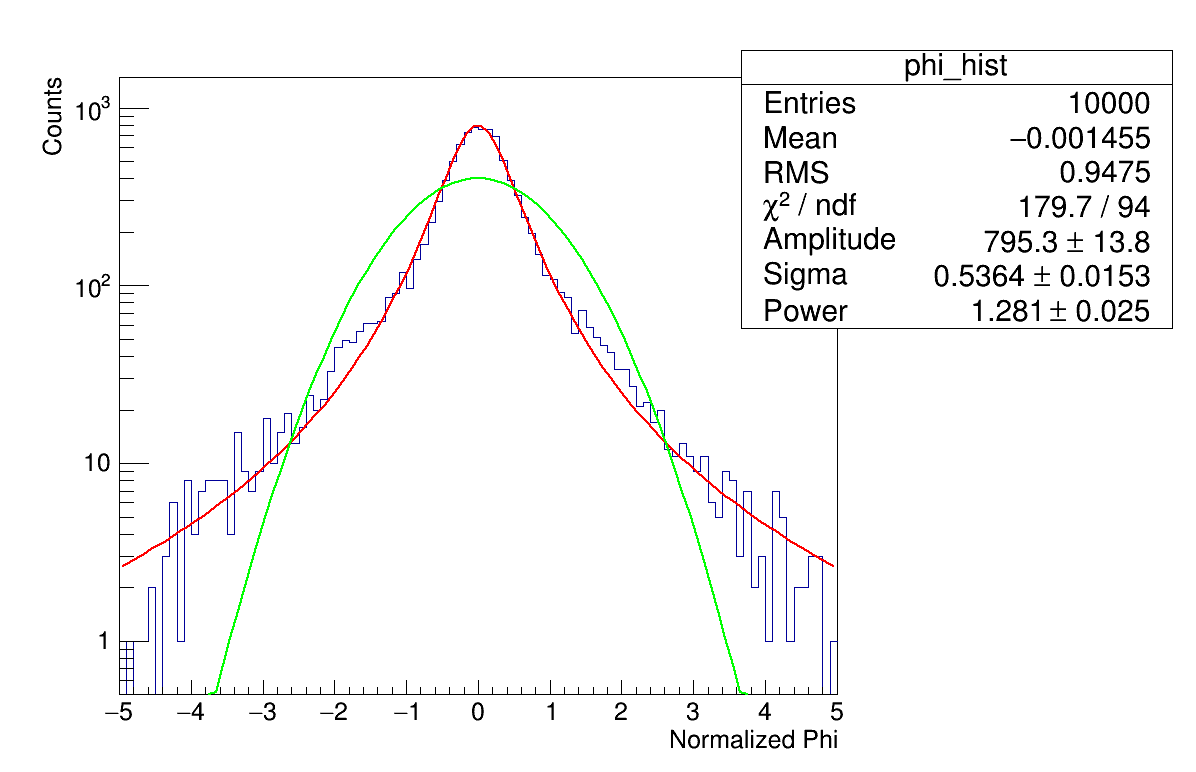

In [27]:
import ROOT
from ROOT import TF1,gPad,gStyle,TCanvas,TH1D,gROOT
import rootnotes
import rootprint
gStyle.SetOptFit()
c1=rootnotes.canvas("Canvas", (1200, 800))
c1.SetRightMargin(0.3)
c1.Clear()
histogram = TH1D("phi_hist","phi_hist",100,-5,5)
rid=7536
par=True
par_str='Par_' if par else 'Anti_'
mean,stdev,dip_pos,dip_str = srkdata.get_data_for_rids_from_database([rid],par_str+"PhiMean,"+par_str+"PhiStDev,DipolePositionBelowChamber,DipoleFieldStrength")[0]
print mean, stdev
histogram.IsA().Destructor( histogram )
histogram = TH1D("phi_hist","phi_hist",100,-5,5)

drawString="(phi-"+str(mean)+")/"+str(stdev)+" >> phi_hist"
c1=srkgraphics.make_root_plot_from_results_file(rid,par,drawString)
histogram.SetTitle(";Normalized Phi;Counts")
histogram.Draw()
phiTsallisFunc = TF1("phiTsallisFunc", "[0]/pow(1+((x)/[1])*((x)/[1]),[2])", -5)
max_bin=histogram.GetBinContent(histogram.GetMaximumBin())
phiTsallisFunc.SetParNames("Amplitude", "Sigma", "Power");
phiTsallisFunc.SetParLimits(1,0.1,20)
phiTsallisFunc.SetParLimits(0,0.5*max_bin,1.5*max_bin)
phiTsallisFunc.SetParLimits(2,0,100)
phiTsallisFunc.SetParameters(max_bin, stdev,2)
histogram.Fit("phiTsallisFunc","M")
if ROOT.gMinuit.fCstatu == "CONVERGED ":
    print "YAY!!!"
print ROOT.gMinuit.fCstatu
# phiTsallisFunc.Draw("same")
gaus = TF1("gaus","400*TMath::Gaus(x,0,1)",-5,5)
gaus.SetLineColor(ROOT.kGreen)
gaus.Draw("same")
c1.SetLogy()
c1

1271.6938535 1293.58932036
OK        


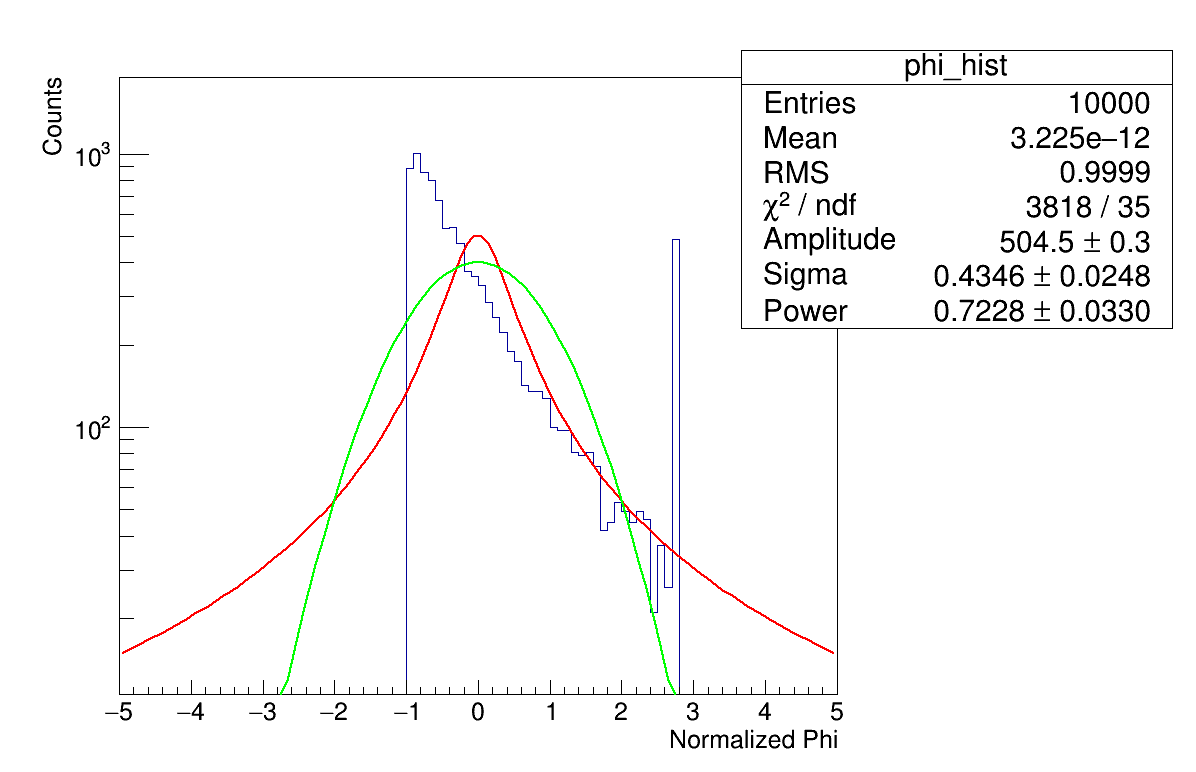

In [30]:

gStyle.SetOptFit()
c1=rootnotes.canvas("Canvas", (1200, 800))
c1.SetRightMargin(0.3)
c1.Clear()
rid=7541
par=True
par_str='Par_' if par else 'Anti_'
mean,stdev,dip_pos,dip_str = srkdata.get_data_for_rids_from_database([rid],par_str+"PhiMean,"+par_str+"PhiStDev,DipolePositionBelowChamber,DipoleFieldStrength")[0]
print mean, stdev
histogram.IsA().Destructor( histogram )
histogram = TH1D("phi_hist","phi_hist",100,-5,5)

drawString="(phi-"+str(mean)+")/"+str(stdev)+" >> phi_hist"
c1=srkgraphics.make_root_plot_from_results_file(rid,par,drawString)
histogram.SetTitle(";Normalized Phi;Counts")
histogram.Draw()
phiTsallisFunc = TF1("phiTsallisFunc", "[0]/pow(1+((x)/[1])*((x)/[1]),[2])", -5)
max_bin=histogram.GetBinContent(histogram.GetMaximumBin())
phiTsallisFunc.SetParNames("Amplitude", "Sigma", "Power");
phiTsallisFunc.SetParLimits(1,0.1,20)
phiTsallisFunc.SetParLimits(0,0.5*max_bin,1.5*max_bin)
phiTsallisFunc.SetParLimits(2,0,100)
phiTsallisFunc.SetParameters(max_bin, stdev,2)
histogram.Fit("phiTsallisFunc","M")
if ROOT.gMinuit.fCstatu == "CONVERGED ":
    print "YAY!!!"
print ROOT.gMinuit.fCstatu
# phiTsallisFunc.Draw("same")
gaus = TF1("gaus","400*TMath::Gaus(x,0,1)",-5,5)
gaus.SetLineColor(ROOT.kGreen)
gaus.Draw("same")
c1.SetLogy()
c1